In [ ]:
!pip install cudf-cu12 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [ ]:
import cudf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning & EDA

In [ ]:
df = cudf.read_csv('all_data_M_2023.csv')

In [ ]:
df

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,23.11,37.01,58.40,"29,050","35,660","48,060","76,980","121,470",<NA>,<NA>
1,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,56.19,81.29,111.36,"54,550","78,330","116,880","169,090","231,620",<NA>,<NA>
2,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,49.74,79.57,#,"46,400","66,170","103,460","165,500",#,<NA>,<NA>
3,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,99.37,#,#,"80,000","130,840","206,680",#,#,<NA>,<NA>
4,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,99.37,#,#,"80,000","130,840","206,680",#,#,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48638,99,U.S.,1,US,334000,Computer and Electronic Product Manufacturing,3-digit,5,11-3121,Human Resources Managers,...,83.98,106.18,#,"106,070","138,240","174,680","220,840",#,<NA>,<NA>
48639,99,U.S.,1,US,334000,Computer and Electronic Product Manufacturing,3-digit,5,11-3130,Training and Development Managers,...,77.17,91.62,106.87,"90,010","116,890","160,520","190,570","222,280",<NA>,<NA>
48640,99,U.S.,1,US,334000,Computer and Electronic Product Manufacturing,3-digit,5,11-3131,Training and Development Managers,...,77.17,91.62,106.87,"90,010","116,890","160,520","190,570","222,280",<NA>,<NA>
48641,99,U.S.,1,US,334000,Computer and Electronic Product Manufacturing,3-digit,5,11-9000,Other Management Occupations,...,85.48,105.95,#,"125,470","153,460","177,800","220,380",#,<NA>,<NA>


In [ ]:
df.describe()

,AREA,AREA_TYPE,NAICS,OWN_CODE,JOBS_1000,LOC_QUOTIENT
count,48643.0,48643.0,48643.000000,48643.000000,0,0
mean,99.0,1.0,183259.354645,50.905228,<NA>,<NA>
std,0.0,0.0,138754.615205,207.795361,<NA>,<NA>
min,99.0,1.0,0.000000,5.000000,<NA>,<NA>
25%,99.0,1.0,62.000000,5.000000,<NA>,<NA>
50%,99.0,1.0,237000.000000,5.000000,<NA>,<NA>
75%,99.0,1.0,315100.000000,5.000000,<NA>,<NA>
max,99.0,1.0,334000.000000,1235.000000,<NA>,<NA>


In [ ]:
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 48643 entries, 0 to 48642
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AREA          48643 non-null  int64
 1   AREA_TITLE    48643 non-null  object
 2   AREA_TYPE     48643 non-null  int64
 3   PRIM_STATE    48643 non-null  object
 4   NAICS         48643 non-null  int64
 5   NAICS_TITLE   48643 non-null  object
 6   I_GROUP       48643 non-null  object
 7   OWN_CODE      48643 non-null  int64
 8   OCC_CODE      48643 non-null  object
 9   OCC_TITLE     48643 non-null  object
 10  O_GROUP       48643 non-null  object
 11  TOT_EMP       48643 non-null  object
 12  EMP_PRSE      48643 non-null  object
 13  JOBS_1000     0 non-null      int8
 14  LOC_QUOTIENT  0 non-null      int8
 15  PCT_TOTAL     45859 non-null  object
 16  PCT_RPT       45859 non-null  object
 17  H_MEAN        48643 non-null  object
 18  A_MEAN        48643 non-null  object
 19  MEAN_PRSE   

In [ ]:
df.isnull().sum() # check for null value

AREA                0
AREA_TITLE          0
AREA_TYPE           0
PRIM_STATE          0
NAICS               0
NAICS_TITLE         0
I_GROUP             0
OWN_CODE            0
OCC_CODE            0
OCC_TITLE           0
O_GROUP             0
TOT_EMP             0
EMP_PRSE            0
JOBS_1000       48643
LOC_QUOTIENT    48643
PCT_TOTAL        2784
PCT_RPT          2784
H_MEAN              0
A_MEAN              0
MEAN_PRSE           0
H_PCT10             0
H_PCT25             0
H_MEDIAN            0
H_PCT75             0
H_PCT90             0
A_PCT10             0
A_PCT25             0
A_MEDIAN            0
A_PCT75             0
A_PCT90             1
ANNUAL          48098
HOURLY          48580
dtype: int64

In [ ]:
# drop annual, hourly, jobs_1000, loc_quotient out of the dataframe

df.drop(columns=['ANNUAL', 'HOURLY', 'JOBS_1000', 'LOC_QUOTIENT'], inplace=True)
df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,13.97,17.14,23.11,37.01,58.40,"29,050","35,660","48,060","76,980","121,470"
1,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,26.23,37.66,56.19,81.29,111.36,"54,550","78,330","116,880","169,090","231,620"
2,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,22.31,31.81,49.74,79.57,#,"46,400","66,170","103,460","165,500",#
3,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,38.46,62.90,99.37,#,#,"80,000","130,840","206,680",#,#
4,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,38.46,62.90,99.37,#,#,"80,000","130,840","206,680",#,#


In [ ]:
# to simplify the analysis, since we only want to spot job trends, we will drop irrelevant columns out
# we will only select relevant columns for analysis: prim_state, own_code, naics_title, tot_emp, a_mean (will give description of this later)

df[['PRIM_STATE', 'NAICS_TITLE', 'OCC_TITLE', 'TOT_EMP', 'A_MEAN']].head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,TOT_EMP,A_MEAN
0,US,Cross-industry,All Occupations,"151,853,870","65,470"
1,US,Cross-industry,Management Occupations,"10,495,770","137,750"
2,US,Cross-industry,Top Executives,"3,751,510","136,100"
3,US,Cross-industry,Chief Executives,"211,230","258,900"
4,US,Cross-industry,Chief Executives,"211,230","258,900"


In [ ]:
# Replace the dataframe with the above selected column (inplace=true), check for null values
df = df[['PRIM_STATE', 'NAICS_TITLE', 'OCC_TITLE', 'TOT_EMP', 'A_MEAN']]
df.isnull().sum()

PRIM_STATE     0
NAICS_TITLE    0
OCC_TITLE      0
TOT_EMP        0
A_MEAN         0
dtype: int64

In [ ]:
# Handle missing values (since we only have 1 missing values, we will simply drop them)
df.dropna(inplace=True)
df.isnull().sum()

PRIM_STATE     0
NAICS_TITLE    0
OCC_TITLE      0
TOT_EMP        0
A_MEAN         0
dtype: int64

Now, the relevant columns for our analysis will include:

- PRIM_STATE: Primary state or region.
- NAICS_TITLE: Industry title.
- OCC_TITLE: Occupation title.
- TOT_EMP: Total employment.
- A_MEAN: Annual mean wage.

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Verify data types
print(df.dtypes)

PRIM_STATE     object
NAICS_TITLE    object
OCC_TITLE      object
TOT_EMP        object
A_MEAN         object
dtype: object


In [ ]:
df
# data is super clean with no duplicates now yay!

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,TOT_EMP,A_MEAN
0,US,Cross-industry,All Occupations,"151,853,870","65,470"
1,US,Cross-industry,Management Occupations,"10,495,770","137,750"
2,US,Cross-industry,Top Executives,"3,751,510","136,100"
3,US,Cross-industry,Chief Executives,"211,230","258,900"
5,US,Cross-industry,General and Operations Managers,"3,507,810","129,330"
...,...,...,...,...,...
48635,US,Computer and Electronic Product Manufacturing,Compensation and Benefits Managers,250,"195,020"
48637,US,Computer and Electronic Product Manufacturing,Human Resources Managers,"2,940","193,100"
48639,US,Computer and Electronic Product Manufacturing,Training and Development Managers,430,"158,200"
48641,US,Computer and Electronic Product Manufacturing,Other Management Occupations,"32,780","191,790"


In [ ]:
# Let's start exploring the data using descriptive analysis

common_job_titles = df['OCC_TITLE'].value_counts().head(10)
print("Common Job Titles:\n", common_job_titles)

# Identify common industries
common_industries = df['NAICS_TITLE'].value_counts().head(10)
print("Common Industries:\n", common_industries)

# Geographical distribution of jobs
geographical_distribution = df['PRIM_STATE'].value_counts().head(10)
print("Geographical Distribution:\n", geographical_distribution)

Common Job Titles:
 OCC_TITLE
All Occupations                                            122
General and Operations Managers                            122
Management Occupations                                     122
Operations Specialties Managers                            122
Top Executives                                             122
Business Operations Specialists                            121
Other Installation, Maintenance, and Repair Occupations    121
Installation, Maintenance, and Repair Occupations          121
Business and Financial Operations Occupations              121
Office and Administrative Support Occupations              121
Name: count, dtype: int64
Common Industries:
 NAICS_TITLE
Cross-industry                                                                                                                                     1139
Cross-industry, Private Ownership only                                                                                            

In [ ]:
# convert common_job_titles to dataframe
cjt = common_job_titles.to_pandas()
cjt_df = pd.DataFrame(cjt)
cjt_df.reset_index(drop=True)
cjt_df

,count
OCC_TITLE,
All Occupations,122
General and Operations Managers,122
Management Occupations,122
Operations Specialties Managers,122
Top Executives,122
Business Operations Specialists,121
"Other Installation, Maintenance, and Repair Occupations",121
"Installation, Maintenance, and Repair Occupations",121
Business and Financial Operations Occupations,121


In [ ]:
# convert common_industries to dataframe
ci = common_industries.to_pandas()
ci_df = pd.DataFrame(ci)
ci_df.reset_index(drop=True)
ci_df.rename(columns={'NAICS_TITLE': 'Industry' , 'count':'count'}, inplace=True)
ci_df

,count
NAICS_TITLE,
Cross-industry,1139
"Cross-industry, Private Ownership only",1120
Administrative and Support and Waste Management and Remediation Services,936
"Federal, State, and Local Government, excluding State and Local Government Schools and Hospitals and the U.S. Postal Service (OEWS Designation)",920
Educational Services,887
"Professional, Scientific, and Technical Services",832
Other Services (except Public Administration),823
Management of Companies and Enterprises,774
Health Care and Social Assistance,772


<Figure size 1000x600 with 0 Axes>

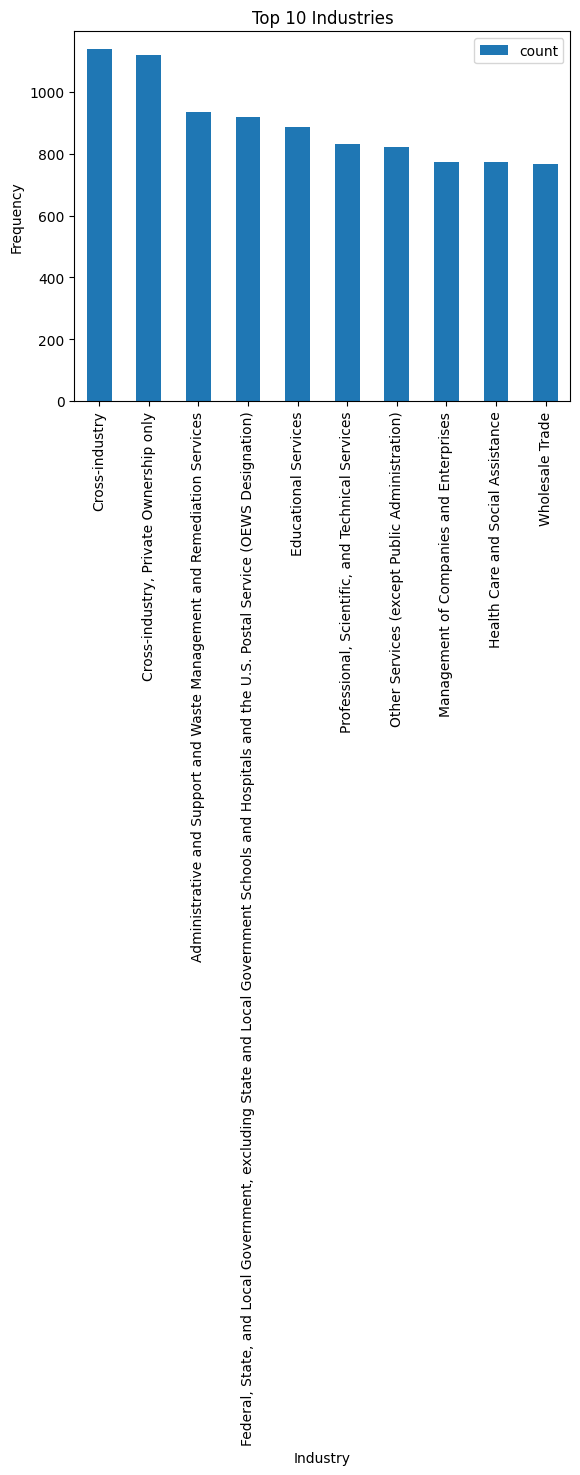

In [ ]:
# Bar chart for common industries
plt.figure(figsize=(10, 6))
ci_df.plot(kind='bar', title='Top 10 Industries')
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.show()

# cross-industry comes in at #1, highlighting how important it is to have DIFFERENT skillsets
# educational services at 5th amount all, highlighting the opportunities for skilltech ecosystem to capitalize on

In [ ]:
# exploring geography of jobs
geographical_distribution_df = geographical_distribution.reset_index()
geographical_distribution_df.columns = ['State', 'Frequency']

geographical_distribution_df

,State,Frequency
0,US,37225


In [ ]:
# Let's explore top 10 best paying jobs

top_10_paying = df.sort_values(by='A_MEAN', ascending=False).head(10)
top_10_paying

# a lot of engineering & CS jobs + niche jobs like 'Radiation Therapists'

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,TOT_EMP,A_MEAN
5227,US,Wholesale Trade,Radiation Therapists,60,"99,980"
19350,US,Support Activities for Mining,Computer Occupations,"1,280","99,980"
21424,US,Fossil Fuel Electric Power Generation,Electricians,"1,820","99,960"
42226,US,Plastics Product Manufacturing,Computer Systems Analysts,620,"99,960"
29279,US,Other Building Equipment Contractors,Miscellaneous Engineers,80,"99,950"
29280,US,Other Building Equipment Contractors,"Engineers, All Other",80,"99,950"
45611,US,Fabricated Metal Product Manufacturing,Information Security Analysts,240,"99,950"
26069,US,Other Heavy and Civil Engineering Construction,"Industrial Engineers, Including Health and Safety",310,"99,940"
43844,US,Primary Metal Manufacturing,"Electronics Engineers, Except Computer",190,"99,940"
23800,US,Nonresidential Building Construction,Computer Network Architects,100,"99,930"


In [ ]:
# let's compute the correlation between total employment and average wage

corr = df.to_pandas()
corr['TOT_EMP'] = corr['TOT_EMP'].replace('**', '0')
corr['TOT_EMP'] = corr['TOT_EMP'].str.replace(',', '').astype(float)
corr['A_MEAN'] = corr['A_MEAN'].replace('**', '0')
corr['A_MEAN'] = corr['A_MEAN'].replace('*', '0')
corr['A_MEAN'] = corr['A_MEAN'].replace('#', '0')
corr['A_MEAN'] = corr['A_MEAN'].str.replace(',', '').astype(float)

correlation_wage_emp = corr[['TOT_EMP', 'A_MEAN']].corr()
correlation_wage_emp

,TOT_EMP,A_MEAN
TOT_EMP,1.000000,-0.006564
A_MEAN,-0.006564,1.000000


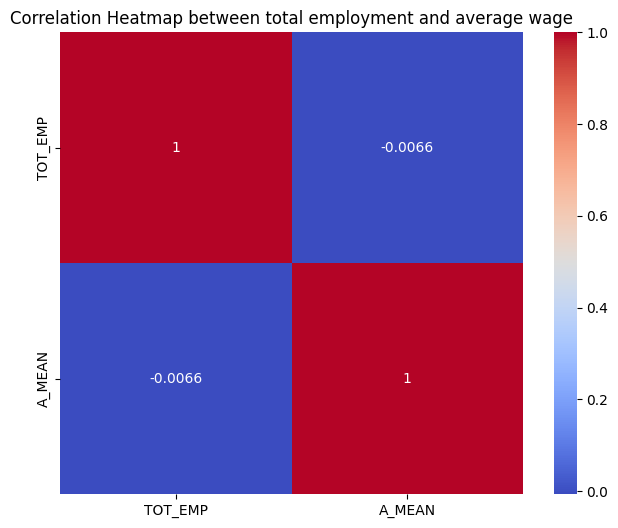

In [ ]:
# heatmap: correlation between total employment and average wage
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_wage_emp, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap between total employment and average wage')
plt.show()

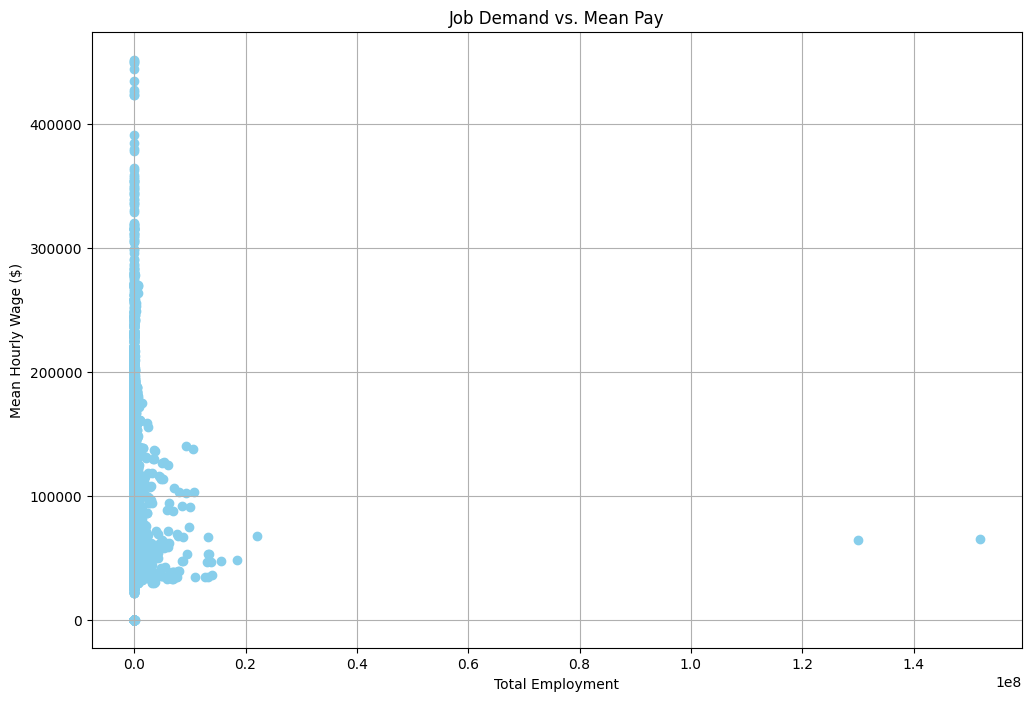

In [ ]:
# Plotting job demand vs. mean pay
plt.figure(figsize=(12, 8))
plt.scatter(corr['TOT_EMP'], corr['A_MEAN'], color='skyblue')
plt.xlabel('Total Employment')
plt.ylabel('Mean Hourly Wage ($)')
plt.title('Job Demand vs. Mean Pay')
plt.grid(True)
plt.show()

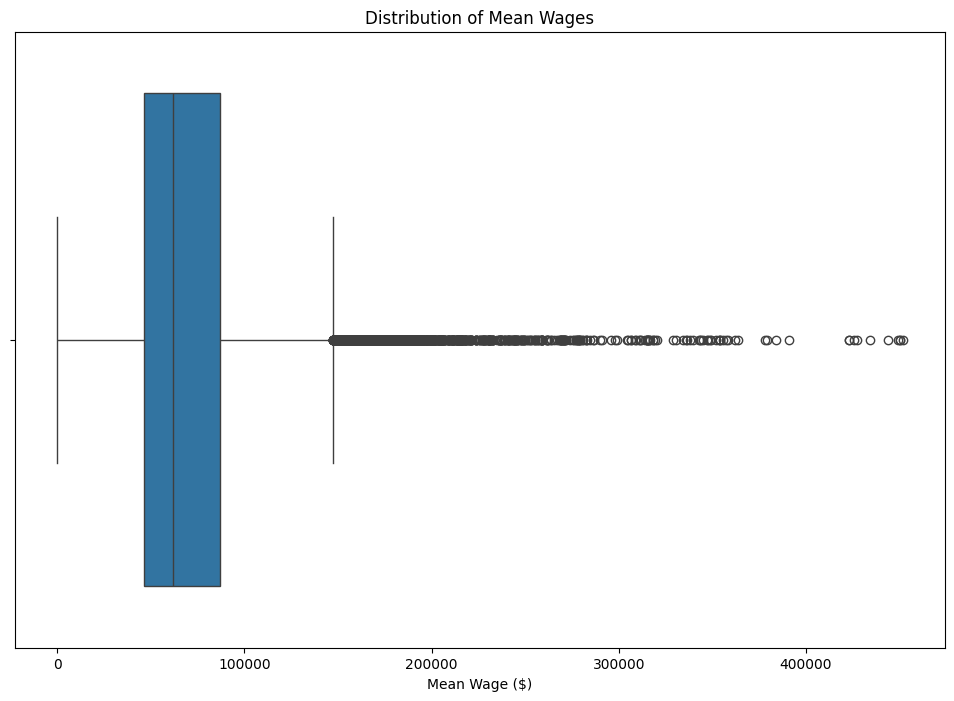

In [ ]:
# Plotting the distribution of mean hourly wages
plt.figure(figsize=(12, 8))
sns.boxplot(x=corr['A_MEAN'])
plt.xlabel('Mean Wage ($)')
plt.title('Distribution of Mean Wages')
plt.show()

In [ ]:
# Average wage and total employment by industry
average_pay_and_employment_by_industry = corr.groupby('NAICS_TITLE').agg({
    'A_MEAN': 'mean',
    'TOT_EMP': 'sum'
}).reset_index()

print("Average Pay and Total Employment by Industry:\n", average_pay_and_employment_by_industry)

Average Pay and Total Employment by Industry:
                                            NAICS_TITLE         A_MEAN  \
0                      Accommodation and Food Services   50814.070796   
1    Administrative and Support and Waste Managemen...   63134.700855   
2           Agriculture, Forestry, Fishing and Hunting   57909.296296   
3       Alumina and Aluminum Production and Processing   73561.705069   
4                            Animal Food Manufacturing   66905.246637   
..                                                 ...            ...   
117  Veneer, Plywood, and Engineered Wood Product M...   60264.093023   
118                    Water, Sewage and Other Systems   76146.948357   
119                                    Wholesale Trade   69886.192960   
120                     Wind Electric Power Generation  102436.568627   
121                         Wood Product Manufacturing   60959.579288   

        TOT_EMP  
0    59477270.0  
1    42556210.0  
2     1962020.0  
3   

In [ ]:
# best paying job fields
average_pay_and_employment_by_industry.sort_values(by='A_MEAN', ascending=False).head()

,NAICS_TITLE,A_MEAN,TOT_EMP
20,Computer and Electronic Product Manufacturing,180034.230769,1482510.0
71,Nuclear Electric Power Generation,119546.590909,166770.0
72,Oil and Gas Extraction,110092.366412,487460.0
50,Hydroelectric Power Generation,108991.727273,35480.0
41,Fossil Fuel Electric Power Generation,104183.517787,342670.0


In [ ]:
# highest in-demand job fields
average_pay_and_employment_by_industry.sort_values(by='TOT_EMP', ascending=False).head()

,NAICS_TITLE,A_MEAN,TOT_EMP
24,Cross-industry,73937.717296,681987390.0
25,"Cross-industry, Private Ownership only",72919.035714,580281940.0
47,Health Care and Social Assistance,71249.235751,97431130.0
29,Educational Services,68463.799324,63187290.0
0,Accommodation and Food Services,50814.070796,59477270.0


## What can we gather as insights?

1. **Average Pay by Job Title / Industry**
- The average mean hourly wage varies significantly across different job titles. Cross-industry functions and Educational sectors are among the highest in-demand roles (1st and 4th respectively), indicating a high demand for a wide variety of skillsets instead of just one (SkillSynergy has meager opportunities to upskill people from cross-industry functions). The focus on EdTech is also appropriate since there's a high emphasis on the educational sector.

- Office and Administrative Support Occupations have a lower average pay, highlighting the need for skills enhancement and upskilling in these areas to bridge the wage gap.

- Computer and Electronic Product Manufacturing is the best paying job overall, emphasizing the need for SkillsSynergy to focus on CS-related skills to capture the demand in the market.

- Upskilling initiatives for lower-paid roles can help improve wages and job satisfaction in those occupations.

2. **Correlation Heatmap**

- The correlation heatmap shows a negative correlation between total employment and mean hourly wage, indicating that higher-paying jobs tend to have lower employment numbers.

- This means that jobs that are high-paying are more competitive. Jobs that offer higher wages often require specialized skills, higher education, or significant experience. These factors naturally limit the number of people qualified for such positions. Vice versa for low-paying ones.

- SkillSynergy needs to address Skill Gaps in Lower-Paying Roles and focus on specialized skillsets to allow those below to progress up and balance the playing fields.


3. **Job Demand vs. Pay Analysis**

- The scatter plot analysis reveals that certain job titles with high demand (total employment) also offer higher pay, suggesting a competitive job market for these roles. (especially true in Professional sectors)


The SkillSynergy ecosystem can leverage this information to design training programs that align with market demands, ensuring that individuals are prepared for well-paying jobs with high demand.
